# HOMEWORK 1

Question 1: Simple Regression

In [24]:
import pandas as pd # for manipulating data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

In [25]:
sns.set()

In [26]:
%matplotlib inline

In [27]:
data=pd.read_csv("/Users/naidanzheng/Downloads/bwght.csv")

In [28]:
data.head()

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
0,13.5,16.5,122.3,109,12.0,12.0,1,1,1,0,4.691348,6.8125,0.0,2.602690
1,7.5,16.5,122.3,133,6.0,12.0,2,1,0,0,4.890349,8.3125,0.0,2.014903
2,0.5,16.5,122.3,129,NaN,12.0,2,0,0,0,4.859812,8.0625,0.0,-0.693147
3,15.5,16.5,122.3,126,12.0,12.0,2,1,0,0,4.836282,7.8750,0.0,2.740840
4,27.5,16.5,122.3,134,14.0,12.0,2,1,1,0,4.897840,8.3750,0.0,3.314186


In [29]:
df=data.dropna() 
df#drop 1388-1192=196 missing values.

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
0,13.5,16.5,122.3,109,12.0,12.0,1,1,1,0,4.691348,6.8125,0.0,2.602690
1,7.5,16.5,122.3,133,6.0,12.0,2,1,0,0,4.890349,8.3125,0.0,2.014903
3,15.5,16.5,122.3,126,12.0,12.0,2,1,0,0,4.836282,7.8750,0.0,2.740840
4,27.5,16.5,122.3,134,14.0,12.0,2,1,1,0,4.897840,8.3750,0.0,3.314186
5,7.5,16.5,122.3,118,12.0,14.0,6,1,0,0,4.770685,7.3750,0.0,2.014903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,12.5,30.0,138.3,87,14.0,12.0,1,1,1,0,4.465908,5.4375,0.0,2.525729
1382,22.5,30.0,138.3,135,16.0,16.0,3,0,1,0,4.905275,8.4375,0.0,3.113515
1383,27.5,30.0,138.3,110,12.0,12.0,4,1,1,0,4.700481,6.8750,0.0,3.314186
1385,65.0,8.0,118.6,135,18.0,16.0,2,0,1,0,4.905275,8.4375,0.0,4.174387


In [30]:
df.mean(axis = 0, skipna = True) 
#The average number of Cigarettes smoke during pregnancy is 1.769102.

faminc       32.219144
cigtax       19.603275
cigprice    130.709656
bwght       119.529807
fatheduc     13.191436
motheduc     13.125105
parity        1.613770
male          0.518892
white         0.843829
cigs          1.769102
lbwght        4.767536
bwghtlbs      7.470613
packs         0.088455
lfaminc       3.276758
dtype: float64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size = 0.2)

In [32]:
print(X_train.shape)
X_train[["bwght", "cigs"]].head()

(952, 14)


,bwght,cigs
905,68,10
70,138,0
1014,127,0
1109,109,0
1321,192,0


In [33]:
print(X_test.shape)
X_test[["bwght", "cigs"]].head()

(239, 14)


,bwght,cigs
833,136,0
777,90,0
1325,151,0
1095,98,0
218,120,0


In [34]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [35]:
print("Train Size", X_train.shape, "Test Size: ", X_test.shape, sep = "\n")
display('X_train[["bwght", "cigs"]].head()', 'X_test[["bwght", "cigs"]].head()')

Train Size
(952, 14)
Test Size: 
(239, 14)


,bwght,cigs
905,68,10
70,138,0
1014,127,0
1109,109,0
1321,192,0
,bwght,cigs
833,136,0
777,90,0
1325,151,0
1095,98,0


The regression equation is $$ bwght = \beta_{0} + \beta_{1} cigs $$ 

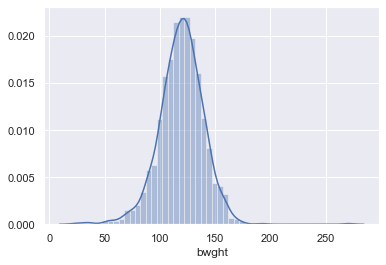

In [36]:
sns.distplot(df['bwght']);
#Normal Distribution

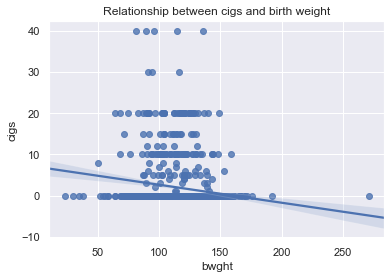

In [37]:
sns.regplot(x='bwght',y='cigs',data=df,fit_reg=True)
plt.title("Relationship between cigs and birth weight")
plt.show()

In [38]:
def least_squares(X,y):
    x_bar = X.mean()
    y_bar = y.mean()
    b1_num = (X - x_bar).dot(y - y_bar)
    b1_denom = ((X - x_bar)**2).sum()
    b1 = b1_num /b1_denom
    b0 = y_bar - b1*x_bar
    MSE = ((y - (b0 + b1*X))**2).mean()
    return  b0,b1, MSE

least_squares(X_train.cigs, X_train.bwght)

(120.89253487443993, -0.7043104021671432, 382.232611102644)

In [39]:
from sklearn.linear_model import LinearRegression

## 2. instantiate the tool you would like to use.
lr = LinearRegression()

## 3. fit the model
lr.fit(X_train[["cigs"]], X_train.bwght)

## 4. check-out the results or make predictions
print(lr.intercept_, lr.coef_)

120.89253487443993 [-0.7043104]


In [40]:
import statsmodels.api as sm
X = X_train[[ 'cigs']]
y = X_train.bwght
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     36.00
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           2.81e-09
Time:                        13:30:57   Log-Likelihood:                -4181.1
No. Observations:                 952   AIC:                             8366.
Df Residuals:                     950   BIC:                             8376.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        120.8925      0.668    181.046      0.0

bwght=120.8573-0.5813cigs,  where n=1192,R^2=0.024, cigs and bwght have negative relationship. 
Therfore with one more cigarette smoked per day during pregnancy, the birthweight is expected to decrease by around 0.5758 ounces.

In [41]:
Xtest = X_test[['cigs']]
ytest = X_test.bwght
Xtest = sm.add_constant(Xtest)
res.predict(Xtest);

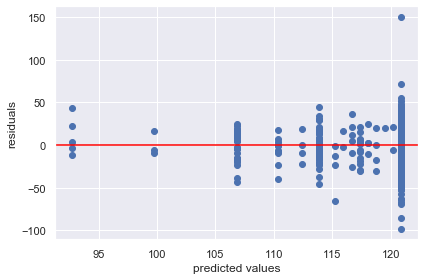

In [42]:
# To diagnose a linear model, check residual plots.
residuals = res.resid
y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('predicted values')

plt.ylabel('residuals')

plt.tight_layout() #

Good model when it only used to find the relationship between bwght and cigs.

Question 2: Multiple Regression

The simple regression from question 1 does not complete explain the causal relationship, because it doesn't analyze other factors which might affect child's birth weight.

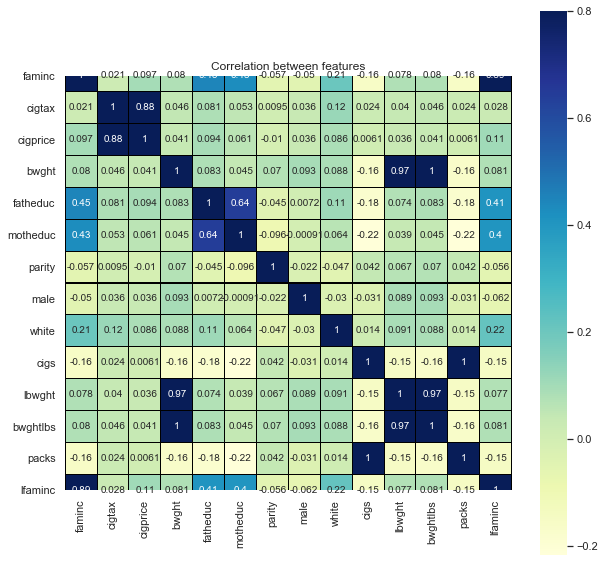

In [43]:
corr=df.corr() #get the coefficient parameters.
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="Black")
plt.title('Correlation between features');

In [44]:
corrmat=data.corr()
corrmat['bwght'].sort_values(ascending = False)

bwghtlbs    1.000000
bwght       1.000000
lbwght      0.975120
white       0.126971
faminc      0.108937
lfaminc     0.105909
fatheduc    0.084030
male        0.072242
motheduc    0.069127
parity      0.054510
cigprice    0.049188
cigtax      0.047802
cigs       -0.150762
packs      -0.150762
Name: bwght, dtype: float64

In [45]:
X = X_train[[ 'cigs','lbwght','lfaminc','white','male','fatheduc','faminc','parity','cigtax','motheduc','packs','cigprice']]
y = X_train.bwght
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary()) # OLS Regression Results

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1425.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:31:06   Log-Likelihood:                -2791.9
No. Observations:                 952   AIC:                             5610.
Df Residuals:                     939   BIC:                             5673.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -387.5031      5.342    -72.539      0.0

bwght=-377.4788+-2.033e+6cigs+103.7763lbwght+  ... + 4.065e+07packs + 0.0078cigprice,n=1192, R^2=0.954(good).

Child's birth weights affects by the factors such as family income, birth order of the child, race, gender, and parent's education.
Therefore, it is more accurate to predict child's birth weights by using these factors.